# Evaluation of Verifiable Decentralized IPFS Clusters (VDICs)
We tested:
1. read performance in VDICs depending on file size and number of nodes (vs. web3.storage pinning service vs. moralis pinning service vs. own node)
2. write performance in VDICs depending on file size and number of nodes (vs. web3.storage vs. moralis pinning service vs. own node)
3. estimate average latency in VDICs depending on file size and numbder of node

NOTE: 
- number of nodes: {3, 5, 10, 15, 20}
- file size (in KB): {1, 10, 100, 1000, 10000}

In this notebook, we analyze and evaluate the above listed metrics.

In [16]:
import pandas as pd
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
import matplotlib.pyplot as plt


## Performance of pinning service providers: Pinata and Moralis

### Moralis

In [17]:
# import csv files, located test-data folder
moralisReadPerformanceMeasurements = pd.read_csv(
    './pinning-services/moralis-read-performance-measurements.csv',
    names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
)
moralisWritePerformanceMeasurements = pd.read_csv(
    './pinning-services/moralis-write-performance-measurements.csv',
    names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
)

# cast for both dataframes the size column from object to base64
moralisReadPerformanceMeasurements['size'] = moralisReadPerformanceMeasurements['size'].apply(pd.to_numeric, errors='coerce')
moralisWritePerformanceMeasurements['size'] = moralisWritePerformanceMeasurements['size'].apply(pd.to_numeric, errors='coerce')

# create column which assign each line to value 1, 10, 100, 1000, 10000 based on size. Each line's size value will be assigned to the closest value from the list
values = [1, 10, 100, 1000, 10000]

# Create a function to find the closest value
def find_closest_value(x):
    return min(values, key=lambda v: abs(v - x))

# Apply the function to the 'size' column and create a new column 'sizeGroup'
moralisReadPerformanceMeasurements['sizeGroup'] = moralisReadPerformanceMeasurements['size'].apply(find_closest_value)
moralisWritePerformanceMeasurements['sizeGroup'] = moralisWritePerformanceMeasurements['size'].apply(find_closest_value)

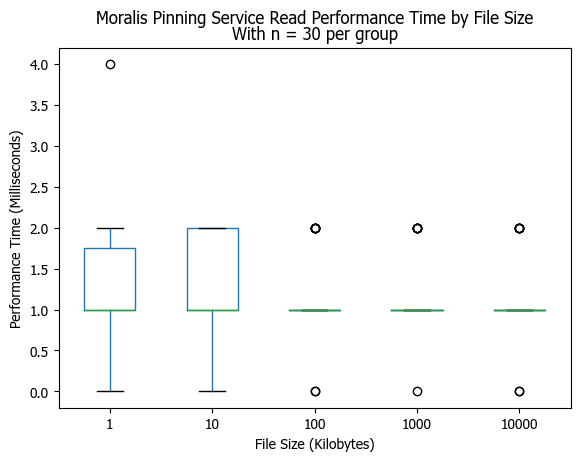

In [18]:
# remove outliers
cleanedMoralisReadPerformanceMeasurements = moralisReadPerformanceMeasurements[
    (moralisReadPerformanceMeasurements['performanceTime'] < 20)
]

# remove files with size nan
cleanedMoralisReadPerformanceMeasurements = cleanedMoralisReadPerformanceMeasurements[
    (cleanedMoralisReadPerformanceMeasurements['size'].notna())
]

# create boxplot of performanceTime based on sizeGroup
boxplot = cleanedMoralisReadPerformanceMeasurements.boxplot(column=['performanceTime'], by='sizeGroup', grid=False)
plt.title('With n = 30 per group')
plt.suptitle('Moralis Pinning Service Read Performance Time by File Size')
plt.xlabel('File Size (Kilobytes)')
plt.ylabel('Performance Time (Milliseconds)')
plt.savefig('./evaluation-figures/moralis-read-performance-time-by-file-size.png')
plt.show()


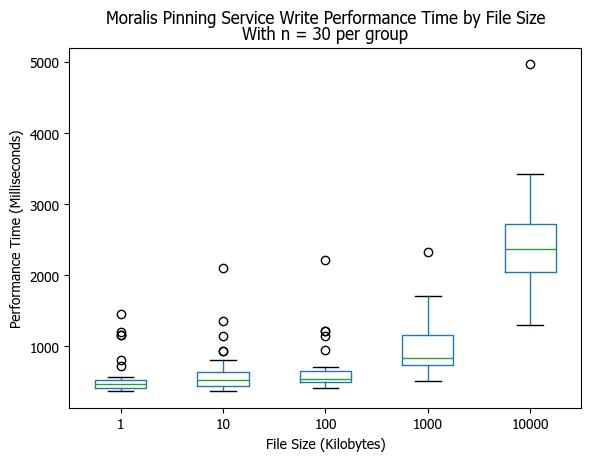

In [19]:
# do the same as in cell before but for write performance measurements
cleanedMoralisWritePerformanceMeasurements = moralisWritePerformanceMeasurements[
    (moralisWritePerformanceMeasurements['performanceTime'] < 5000)
]  

cleanedMoralisWritePerformanceMeasurements = cleanedMoralisWritePerformanceMeasurements[
    (cleanedMoralisWritePerformanceMeasurements['size'].notna())
]

boxplot = cleanedMoralisWritePerformanceMeasurements.boxplot(column=['performanceTime'], by='sizeGroup', grid=False)
plt.title('With n = 30 per group')
plt.suptitle('Moralis Pinning Service Write Performance Time by File Size')
plt.xlabel('File Size (Kilobytes)')
plt.ylabel('Performance Time (Milliseconds)')
plt.savefig('./evaluation-figures/moralis-write-performance-time-by-file-size.png')
plt.show()

### Pinata

In [20]:
# import csv files, located test-data folder
pinataReadPerformanceMeasurements = pd.read_csv(
    './pinning-services/pinata-read-performance-measurements.csv',
    names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
)
pinataWritePerformanceMeasurements = pd.read_csv(
    './pinning-services/pinata-write-performance-measurements.csv',
    names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
)

# cast for both dataframes the size column from object to base64
pinataReadPerformanceMeasurements['size'] = pinataReadPerformanceMeasurements['size'].apply(pd.to_numeric, errors='coerce')
pinataWritePerformanceMeasurements['size'] = pinataWritePerformanceMeasurements['size'].apply(pd.to_numeric, errors='coerce')

# Apply the function to the 'size' column and create a new column 'sizeGroup'
pinataReadPerformanceMeasurements['sizeGroup'] = pinataReadPerformanceMeasurements['size'].apply(find_closest_value)
pinataWritePerformanceMeasurements['sizeGroup'] = pinataWritePerformanceMeasurements['size'].apply(find_closest_value)

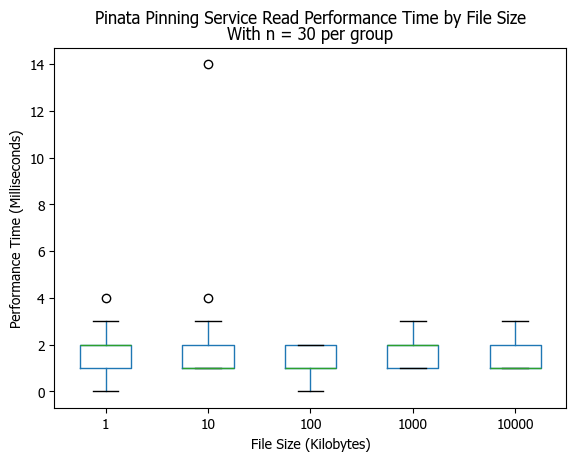

In [21]:
# remove outliers
cleanedPinataReadPerformanceMeasurements = pinataReadPerformanceMeasurements[
    (pinataReadPerformanceMeasurements['performanceTime'] < 20)
]

# remove files with size nan
cleanedPinataReadPerformanceMeasurements = cleanedPinataReadPerformanceMeasurements[
    (cleanedPinataReadPerformanceMeasurements['size'].notna())
]

# create boxplot of performanceTime based on sizeGroup
boxplot = cleanedPinataReadPerformanceMeasurements.boxplot(column=['performanceTime'], by='sizeGroup', grid=False)
plt.title('With n = 30 per group')
plt.suptitle('Pinata Pinning Service Read Performance Time by File Size')
plt.xlabel('File Size (Kilobytes)')
plt.ylabel('Performance Time (Milliseconds)')
plt.savefig('./evaluation-figures/pinata-read-performance-time-by-file-size.png')
plt.show()

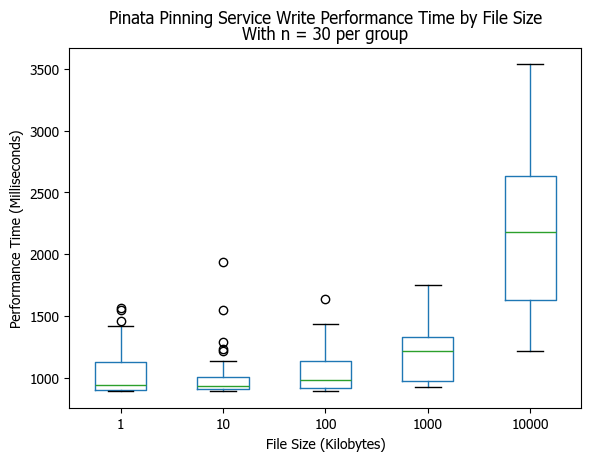

In [22]:
# do the same as in cell before but for write performance measurements
cleanedPinataWritePerformanceMeasurements = pinataWritePerformanceMeasurements[
    (pinataWritePerformanceMeasurements['performanceTime'] < 5000)
]  

cleanedPinataWritePerformanceMeasurements = cleanedPinataWritePerformanceMeasurements[
    (cleanedPinataWritePerformanceMeasurements['size'].notna())
]

boxplot = cleanedPinataWritePerformanceMeasurements.boxplot(column=['performanceTime'], by='sizeGroup', grid=False)
plt.title('With n = 30 per group')
plt.suptitle('Pinata Pinning Service Write Performance Time by File Size')
plt.xlabel('File Size (Kilobytes)')
plt.ylabel('Performance Time (Milliseconds)')
plt.savefig('./evaluation-figures/pinata-write-performance-time-by-file-size.png')
plt.show()

## Performance of VDICs

In [23]:
# import performance measurements of tested VDICs with different number of nodes
vdics = [
    {
        "numberOfNodes": 3,
        "readPerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/3-node-vdic-read-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        ),
        "writePerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/3-node-vdic-write-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        )
    },
   {
        "numberOfNodes": 5,
        "readPerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/5-node-vdic-read-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        ),
        "writePerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/5-node-vdic-write-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        )
    },
    {
        "numberOfNodes": 10,
        "readPerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/10-node-vdic-read-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        ),
        "writePerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/10-node-vdic-write-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        )
    },
    {
        "numberOfNodes": 15,
        "readPerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/15-node-vdic-read-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        ),
        "writePerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/15-node-vdic-write-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        )
    },
    {
        "numberOfNodes": 20,
        "readPerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/20-node-vdic-read-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        ),
        "writePerformanceMeasurements": pd.read_csv(
            './vdic-gateway/performance-measurements/20-node-vdic-write-performance-measurements.csv',
            names=["timestamp", "operator", "operation", "file", "size", "performanceTime"]
        )
    }
]

In [24]:
# create column which assign each line to value 1, 10, 100, 1000, 10000 based on size. Each line's size value will be assigned to the closest value from the list
for vdic in vdics:
    # cast for both dataframes the size column from object to base64
    vdic["readPerformanceMeasurements"]['size'] = vdic["readPerformanceMeasurements"]['size'].apply(pd.to_numeric, errors='coerce')
    vdic["writePerformanceMeasurements"]['size'] = vdic["writePerformanceMeasurements"]['size'].apply(pd.to_numeric, errors='coerce')

    # Apply the function to the 'size' column and create a new column 'sizeGroup'
    vdic["readPerformanceMeasurements"]['sizeGroup'] = vdic["readPerformanceMeasurements"]['size'].apply(find_closest_value)
    vdic["writePerformanceMeasurements"]['sizeGroup'] = vdic["writePerformanceMeasurements"]['size'].apply(find_closest_value)

    # remove outliers
    vdic["cleanedReadPerformanceMeasurements"] = vdic["readPerformanceMeasurements"][
        (vdic["readPerformanceMeasurements"]['performanceTime'] < 10000)
    ]

    # remove files with size nan
    vdic["cleanedReadPerformanceMeasurements"] = vdic["cleanedReadPerformanceMeasurements"][
        (vdic["cleanedReadPerformanceMeasurements"]['size'].notna())
    ]

    # remove outliers
    vdic["cleanedWritePerformanceMeasurements"] = vdic["writePerformanceMeasurements"][
        (vdic["writePerformanceMeasurements"]['performanceTime'] < 10000)
    ]

    # remove files with size nan
    vdic["cleanedWritePerformanceMeasurements"] = vdic["cleanedWritePerformanceMeasurements"][
        (vdic["cleanedWritePerformanceMeasurements"]['size'].notna())
    ]

### Read performance

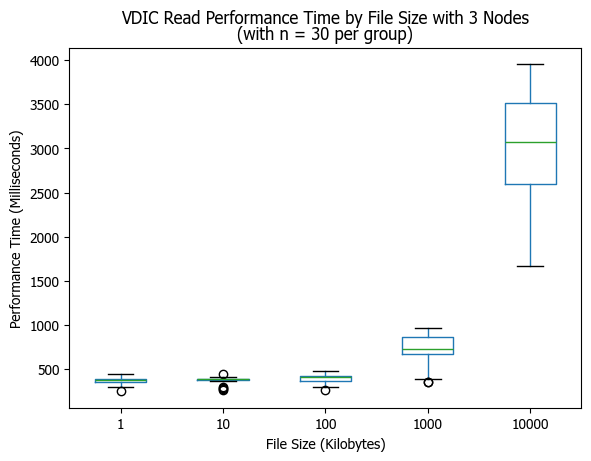

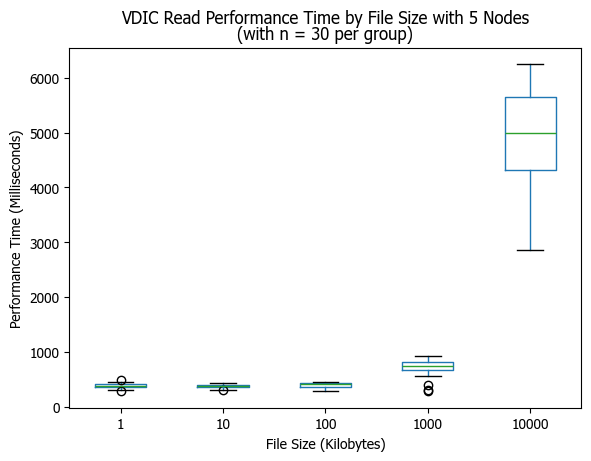

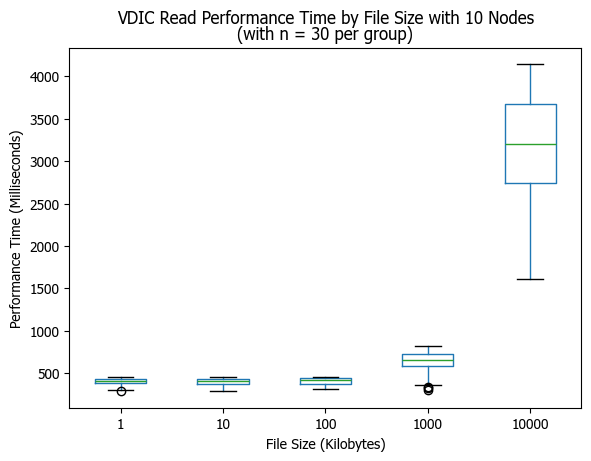

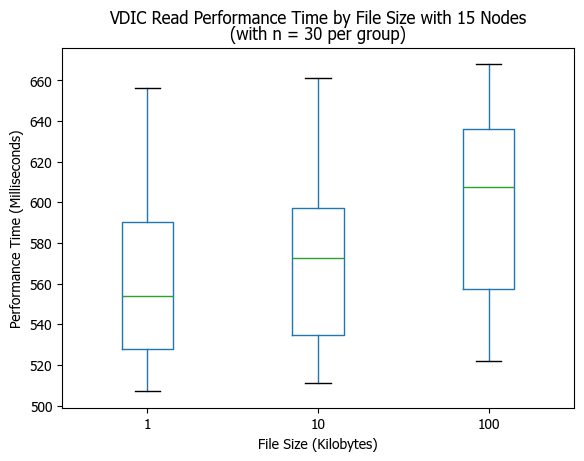

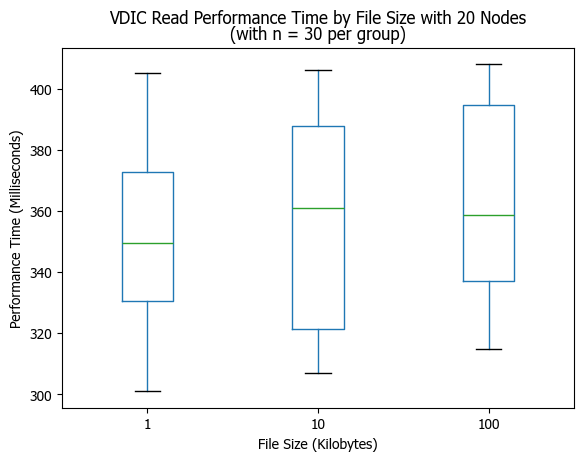

In [25]:
# create boxplot of read performance time based on sizeGroup
for vdic in vdics:
    boxplot = vdic["cleanedReadPerformanceMeasurements"].boxplot(column=['performanceTime'], by='sizeGroup', grid=False)
    plt.title('(with n = 30 per group)')
    plt.suptitle(f'VDIC Read Performance Time by File Size with {vdic["numberOfNodes"]} Nodes')
    plt.xlabel('File Size (Kilobytes)')
    plt.ylabel('Performance Time (Milliseconds)')
    plt.savefig(f'./evaluation-figures/vdic-read-performances/{vdic["numberOfNodes"]}-node-vdic-read-performance-time-by-file-size.png')

The figure uses on avergae 30.0 observations per vidc size (3, 5, 10, 15, 20) that are 10 KB sized text files.
In particular, the following number of observations were used for each VDIC size: 0    30
1    30
2    30
3    30
4    30
Name: numberOfObservations, dtype: int64


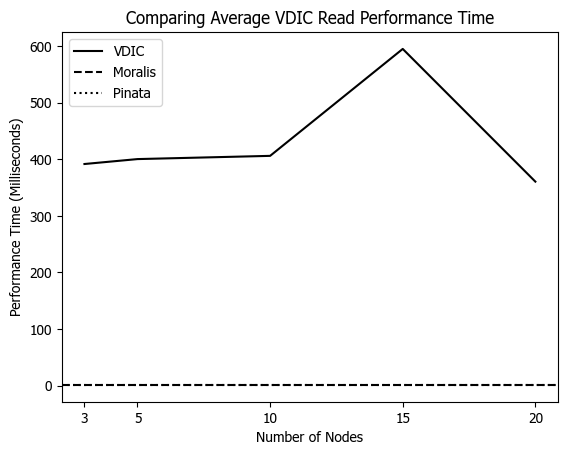

In [26]:
# Compare read performance time of VDICs with different number of nodes (based on 10 KB file)
avgReadPerformanceTimeByVdicSize = []
for vdic in vdics:
    temp=vdic["cleanedReadPerformanceMeasurements"][vdic["cleanedReadPerformanceMeasurements"]["sizeGroup"] == 100]['performanceTime']
    avgReadPerformanceTimeByVdicSize.append(
        {
            "numberOfNodes": vdic["numberOfNodes"],
            "avgReadPerformanceTime": temp.mean(),
            "numberOfObservations": len(temp)
        }
    )

# plot the average read performance time of VDICs with different number of nodes
avgReadPerformanceTimeByVdicSize = pd.DataFrame(avgReadPerformanceTimeByVdicSize)
plt.plot(
    avgReadPerformanceTimeByVdicSize['numberOfNodes'], avgReadPerformanceTimeByVdicSize['avgReadPerformanceTime'],
    color="black",
    label = "VDIC"
)
plt.axhline(
    y = cleanedMoralisReadPerformanceMeasurements[cleanedMoralisReadPerformanceMeasurements["sizeGroup"] == 100]["performanceTime"].mean(), 
    linestyle = 'dashed', 
    color="black",
    label = "Moralis"
)   
plt.axhline(
    y = cleanedPinataReadPerformanceMeasurements[cleanedPinataReadPerformanceMeasurements["sizeGroup"] == 100]["performanceTime"].mean(), 
    linestyle = ':', 
    color="black",
    label = "Pinata"
)    
plt.title("Comparing Average VDIC Read Performance Time") # old but too long title: Comparign Average VDIC Read Performance Time by VDIC Size to pinning service providers: Pinata and Moralis'
plt.xticks(avgReadPerformanceTimeByVdicSize['numberOfNodes'])
plt.xlabel('Number of Nodes')
plt.ylabel('Performance Time (Milliseconds)')
plt.legend() 
plt.savefig('./evaluation-figures/vdic-average-read-performance-time-by-vdic-size.png')

# print information about the data used in the figure
print("The figure uses on avergae",avgReadPerformanceTimeByVdicSize['numberOfObservations'].mean(),"observations per vidc size (3, 5, 10, 15, 20) that are 10 KB sized text files.")
print("In particular, the following number of observations were used for each VDIC size:", str(avgReadPerformanceTimeByVdicSize['numberOfObservations']))

# print figure
plt.show()

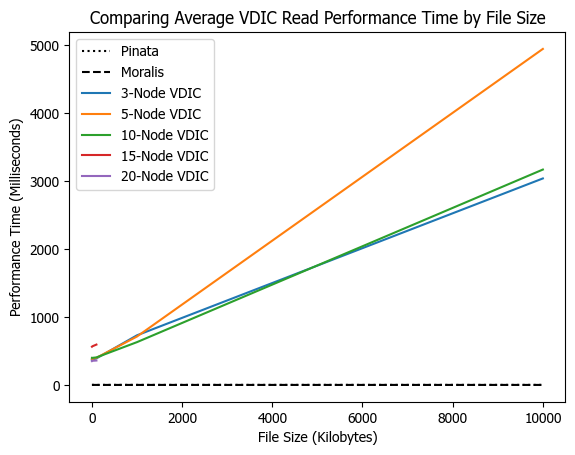

In [27]:
# compare the average read performance time of VDICs with different number of nodes to the pinning service providers for each file size
avgReadPerformanceTimeByVdicSize = []
for vdic in vdics:
    for size in values:
        temp = vdic["cleanedReadPerformanceMeasurements"][vdic["cleanedReadPerformanceMeasurements"]["sizeGroup"] == size]['performanceTime']
        avgReadPerformanceTimeByVdicSize.append(
            {
                "numberOfNodes": vdic["numberOfNodes"],
                "size": size,
                "avgReadPerformanceTime": temp.mean(),
                "numberOfObservations": len(temp)
            }
        )  
    
avgReadPerformanceTimeByVdicSize = pd.DataFrame(avgReadPerformanceTimeByVdicSize)

plt.plot(
    values,
    cleanedPinataReadPerformanceMeasurements.groupby('sizeGroup')['performanceTime'].mean().tolist(),
    linestyle = ':', 
    color="black",
    label = "Pinata"	
)
plt.plot(
    values,
    cleanedMoralisReadPerformanceMeasurements.groupby('sizeGroup')['performanceTime'].mean().tolist(),
    linestyle = 'dashed', 
    color="black",
    label = "Moralis"	
)
for nrNode in avgReadPerformanceTimeByVdicSize["numberOfNodes"].unique():	
    plt.plot(
        values,
        avgReadPerformanceTimeByVdicSize[avgReadPerformanceTimeByVdicSize["numberOfNodes"] == nrNode]['avgReadPerformanceTime'].tolist(),
        label = f"{nrNode}-Node VDIC"
    )
plt.title("Comparing Average VDIC Read Performance Time by File Size") # old title which was too long: Comparing Average VDIC Read Performance Time by VDIC Size to pinning service providers: Pinata and Moralis
plt.xlabel('File Size (Kilobytes)')
plt.ylabel('Performance Time (Milliseconds)')
plt.legend()
#plt.savefig('./evaluation-figures/vdic-average-read-performance-time-by-file-size.png')     
plt.show()

### Write performance

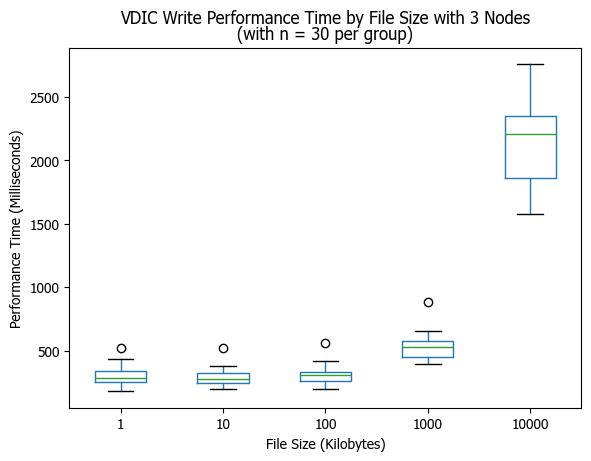

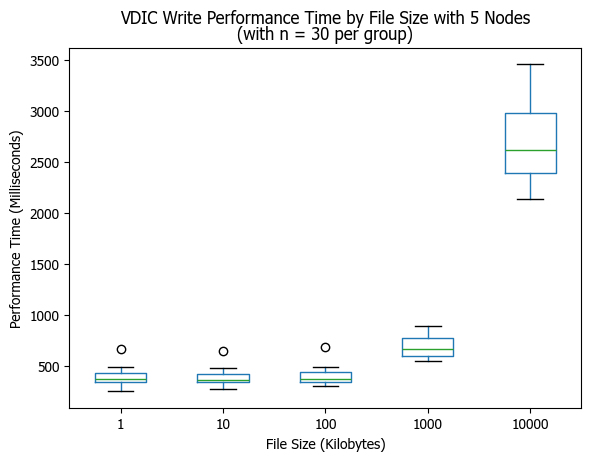

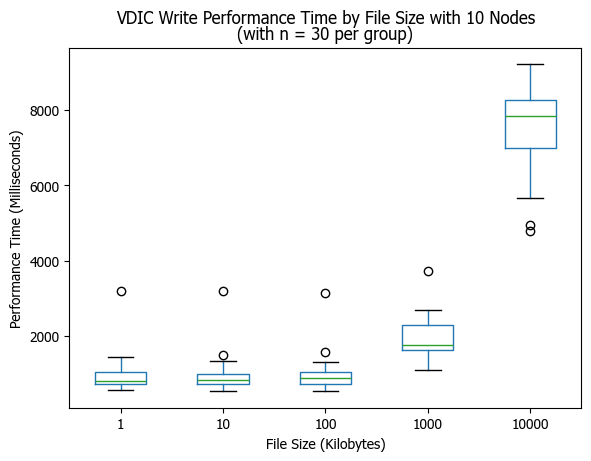

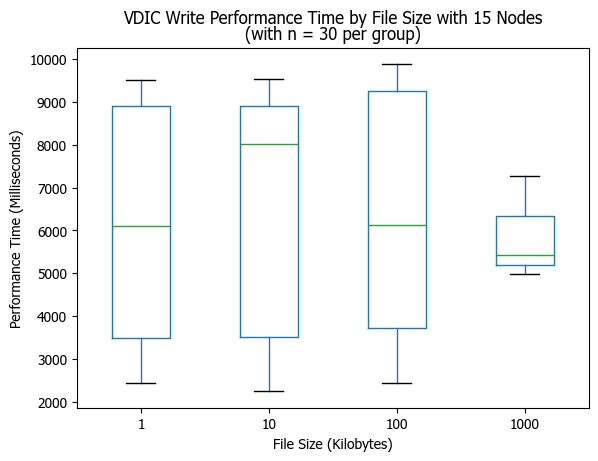

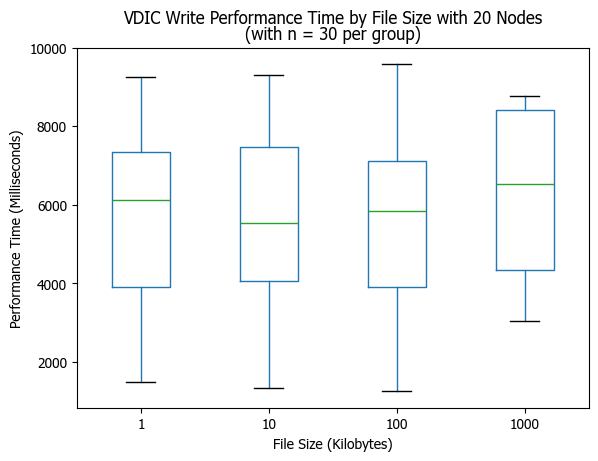

In [28]:
# create boxplot of write performance time based on sizeGroup
for vdic in vdics:
    boxplot = vdic["cleanedWritePerformanceMeasurements"].boxplot(column=['performanceTime'], by='sizeGroup', grid=False)
    plt.title('(with n = 30 per group)')
    plt.suptitle(f'VDIC Write Performance Time by File Size with {vdic["numberOfNodes"]} Nodes')
    plt.xlabel('File Size (Kilobytes)')
    plt.ylabel('Performance Time (Milliseconds)')
    plt.savefig(f'./evaluation-figures/vdic-write-performances/{vdic["numberOfNodes"]}-node-vdic-write-performance-time-by-file-size.png')

The figure uses on avergae 26.6 observations per vidc size (3, 5, 10, 15, 20) that are 10 KB sized text files.
In partciulr the following number of observations were used for each VDIC size: 0    30
1    30
2    30
3    13
4    30
Name: numberOfObservations, dtype: int64


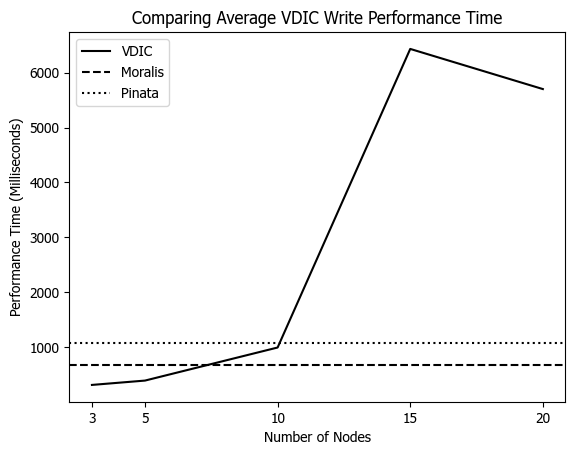

In [29]:
# Compare write performance time of VDICs with different number of nodes (based on 10 KB file)
avgWritePerformanceTimeByVdicSize = []
for vdic in vdics:
    temp = vdic["cleanedWritePerformanceMeasurements"][vdic["cleanedWritePerformanceMeasurements"]["sizeGroup"] == 100]['performanceTime']
    avgWritePerformanceTimeByVdicSize.append(
        {
            "numberOfNodes": vdic["numberOfNodes"],
            "avgWritePerformanceTime": temp.mean(),
            "numberOfObservations": len(temp)
        }
    )

# plot the average read performance time of VDICs with different number of nodes
avgWritePerformanceTimeByVdicSize = pd.DataFrame(avgWritePerformanceTimeByVdicSize)
plt.plot(
    avgWritePerformanceTimeByVdicSize['numberOfNodes'], avgWritePerformanceTimeByVdicSize['avgWritePerformanceTime'],
    color="black",
    label = "VDIC"
)
plt.axhline(
    y = cleanedMoralisWritePerformanceMeasurements[cleanedMoralisWritePerformanceMeasurements["sizeGroup"] == 100]["performanceTime"].mean(), 
    linestyle = 'dashed', 
    color="black",
    label = "Moralis"
)   
plt.axhline(
    y = cleanedPinataWritePerformanceMeasurements[cleanedPinataWritePerformanceMeasurements["sizeGroup"] == 100]["performanceTime"].mean(), 
    linestyle = ':', 
    color="black",
    label = "Pinata"
)
plt.title("Comparing Average VDIC Write Performance Time") # old title which was too long: Comparing Average VDIC Write Performance Time by VDIC Size to pinning service providers: Pinata and Moralis
plt.xticks(avgWritePerformanceTimeByVdicSize['numberOfNodes'])
plt.xlabel('Number of Nodes')
plt.ylabel('Performance Time (Milliseconds)')
plt.legend()
plt.savefig('./evaluation-figures/vdic-average-write-performance-time-by-vdic-size.png')

# print information about the data used in the figure
print("The figure uses on avergae", avgWritePerformanceTimeByVdicSize['numberOfObservations'].mean(),"observations per vidc size (3, 5, 10, 15, 20) that are 10 KB sized text files.")
print("In partciulr the following number of observations were used for each VDIC size:", str(avgWritePerformanceTimeByVdicSize['numberOfObservations']))

# print figure
plt.show()

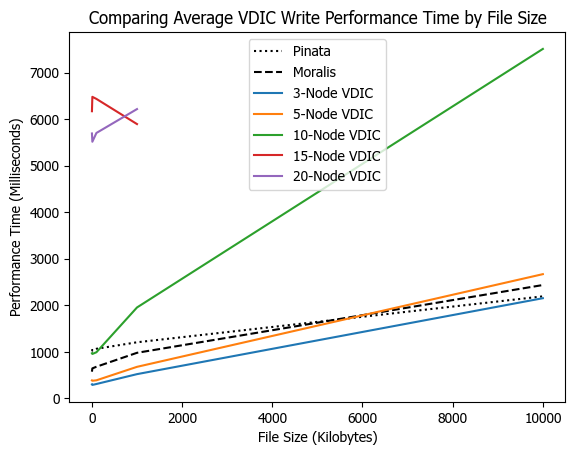

In [30]:
# compare the average write performance time of VDICs with different number of nodes to the pinning service providers for each file size
avgWritePerformanceTimeByVdicSize = []
for vdic in vdics:
    for size in values:
        temp = vdic["cleanedWritePerformanceMeasurements"][vdic["cleanedWritePerformanceMeasurements"]["sizeGroup"] == size]['performanceTime']
        avgWritePerformanceTimeByVdicSize.append(
            {
                "numberOfNodes": vdic["numberOfNodes"],
                "size": size,
                "avgWritePerformanceTime": temp.mean(),
                "numberOfObservations": len(temp)
            }
        )  
    
avgWritePerformanceTimeByVdicSize = pd.DataFrame(avgWritePerformanceTimeByVdicSize)

plt.plot(
    values,
    cleanedPinataWritePerformanceMeasurements.groupby('sizeGroup')['performanceTime'].mean().tolist(),
    linestyle = ':', 
    color="black",
    label = "Pinata"	
)
plt.plot(
    values,
    cleanedMoralisWritePerformanceMeasurements.groupby('sizeGroup')['performanceTime'].mean().tolist(),
    linestyle = 'dashed', 
    color="black",
    label = "Moralis"	
)
for nrNode in avgWritePerformanceTimeByVdicSize["numberOfNodes"].unique():	
    plt.plot(
        values,
        avgWritePerformanceTimeByVdicSize[avgWritePerformanceTimeByVdicSize["numberOfNodes"] == nrNode]['avgWritePerformanceTime'].tolist(),
        label = f"{nrNode}-Node VDIC"
    )
plt.title("Comparing Average VDIC Write Performance Time by File Size") # old title which was too long: Comparing Average VDIC Write Performance Time by VDIC Size to pinning service providers: Pinata and Moralis
plt.xlabel('File Size (Kilobytes)')
plt.ylabel('Performance Time (Milliseconds)')
plt.legend()
#plt.savefig('./evaluation-figures/vdic-average-write-performance-time-by-file-size.png')     
plt.show()

### Latency
Latency is the time needed for a newly added file to fully replicate accross all nodes of VDICs. The average write performance time by vdic size reflects this already.